In [1]:
# read data 
import pandas as pd

df=pd.read_csv('Housing.csv')

df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

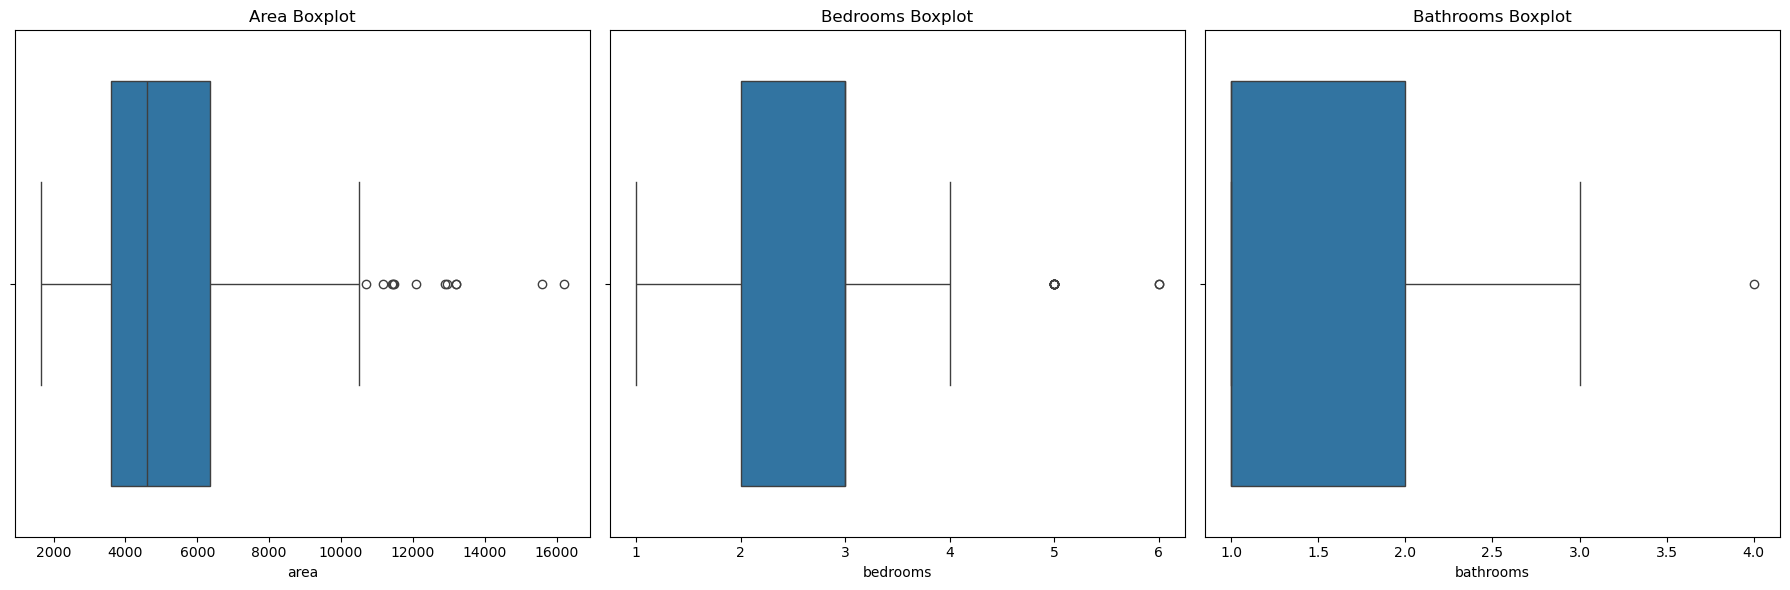

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6)) 

plt.subplot(1, 3, 1)
sns.boxplot(x=df['area'])
plt.title("Area Boxplot")

plt.subplot(1, 3, 2)
sns.boxplot(x=df['bedrooms'])
plt.title("Bedrooms Boxplot")

plt.subplot(1, 3, 3)
sns.boxplot(x=df['bathrooms'])
plt.title("Bathrooms Boxplot")

plt.tight_layout()
plt.show()


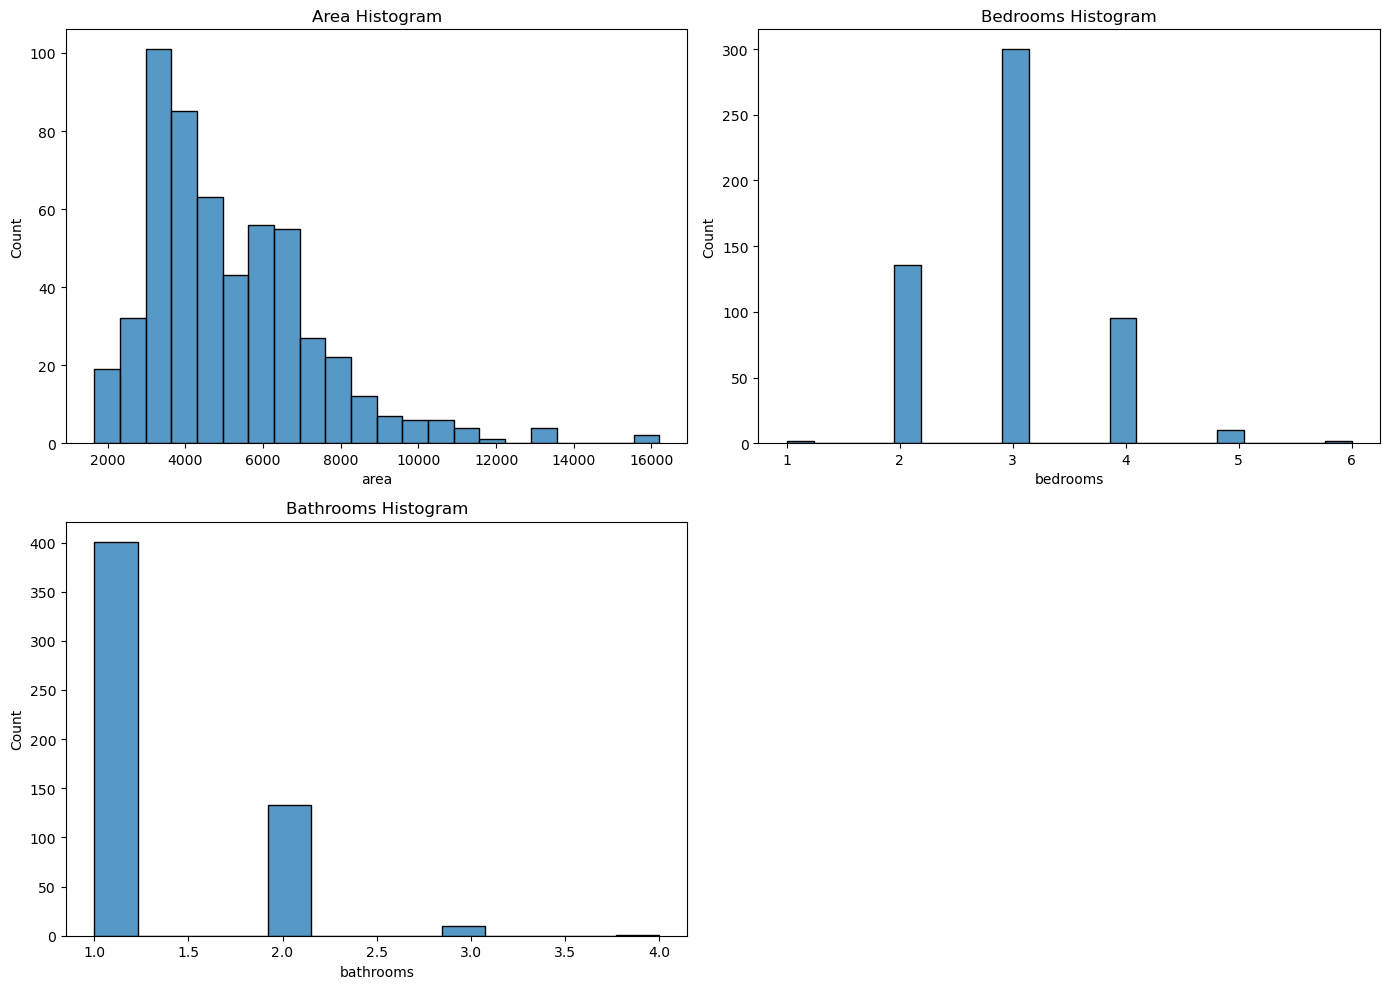

In [3]:
# visualization data to check their is skewness in data or not
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# 1st histogram
plt.subplot(2, 2, 1)
sns.histplot(df['area'])
plt.title("Area Histogram")

# 2nd histogram
plt.subplot(2, 2, 2)
sns.histplot(df['bedrooms'])
plt.title("Bedrooms Histogram")

# 3rd histogram
plt.subplot(2, 2, 3)
sns.histplot(df['bathrooms'])
plt.title("Bathrooms Histogram")


plt.tight_layout()
plt.show()


In [4]:
# scalling to remove skewness
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled=df.copy()
col_name=['area','bedrooms','bathrooms']

features=df_scaled[col_name]

df_scaled[col_name]=scaler.fit_transform(features.values)
df_scaled

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,0.502405,0.6,1.000000,4,yes,no,no,no,yes,3,no,furnished
2,12250000,0.571134,0.4,0.333333,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,0.402062,0.6,0.333333,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,0.396564,0.6,0.000000,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,0.2,0.000000,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,0.051546,0.4,0.000000,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,0.135395,0.2,0.000000,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,0.086598,0.4,0.000000,1,no,no,no,no,no,0,no,furnished


In [5]:
# handling outlier using iqr method
import numpy as np

Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#calculating outliers
outliers=df[(df['area']<lower_bound) | (df['area']>upper_bound)]

#removing outliers
median=df['area'].median()
df['area'] = df['area'].apply(
    lambda x: median if x < lower_bound else upper_bound if x > upper_bound else x
)

In [6]:
import numpy as np

Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#calculating outliers
outliers=df[(df['bedrooms']<lower_bound) | (df['bedrooms']>upper_bound)]

#removing outliers
median=df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].apply(
    lambda x: median if x < lower_bound else upper_bound if x > upper_bound else x
)

In [7]:
import numpy as np

Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#calculating outliers
outliers=df[(df['bedrooms']<lower_bound) | (df['bedrooms']>upper_bound)]

#removing outliers
median=df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].apply(
    lambda x: median if x < lower_bound else upper_bound if x > upper_bound else x
)

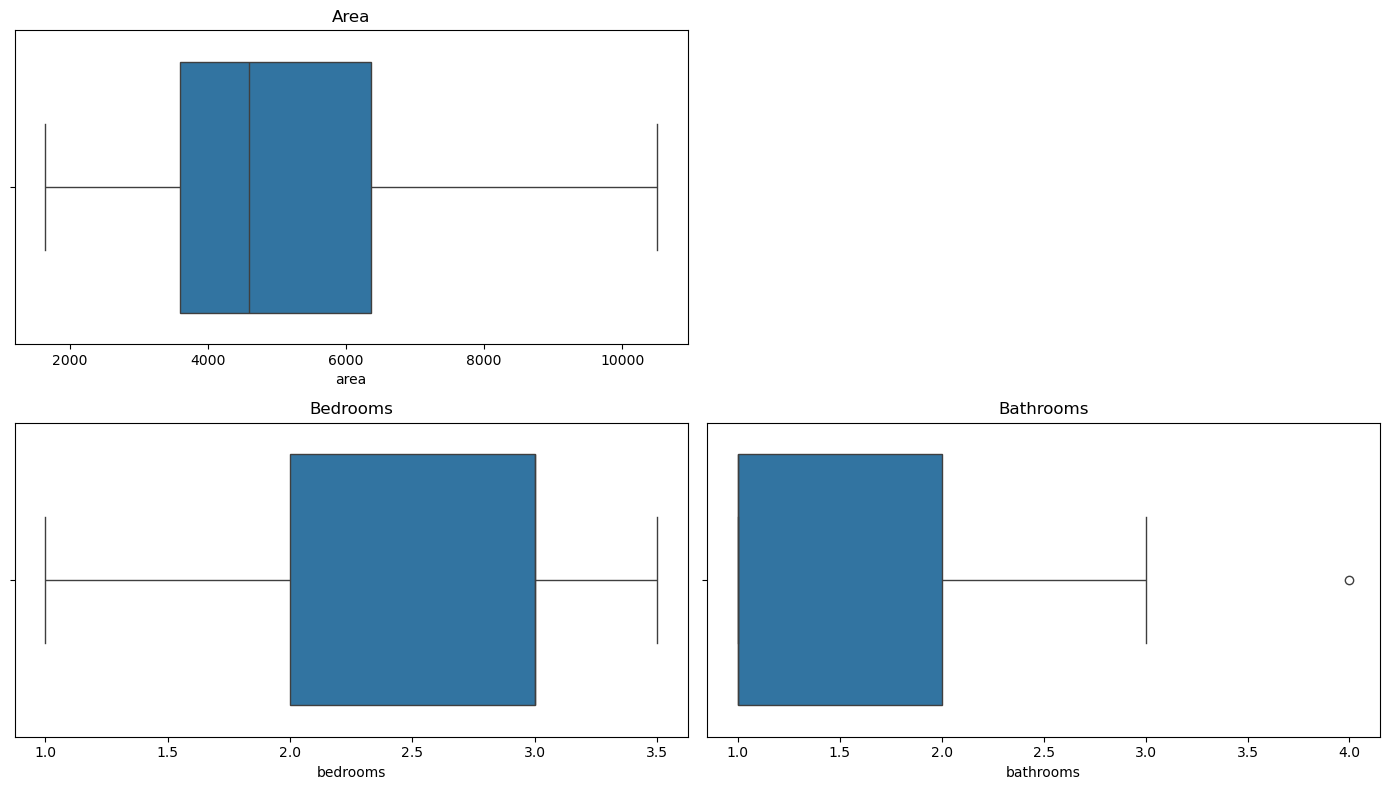

In [8]:
# check outlier is remove or not
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

plt.subplot(2,2,1)
sns.boxplot(x=df['area'])
plt.title("Area")

# plt.subplot(2,2,2)
# sns.boxplot(x=df['stories'])
# plt.title("Stories")

plt.subplot(2,2,3)
sns.boxplot(x=df['bedrooms'])
plt.title("Bedrooms")

plt.subplot(2,2,4)
sns.boxplot(x=df['bathrooms'])
plt.title("Bathrooms")

plt.tight_layout()
plt.show()


In [9]:
# multiple regression 
x = df[['area', 'bedrooms', 'bathrooms']]  
y = df['price'] 

In [10]:
# train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)
y_pred

array([3489667.31761179, 5000727.87734583, 3610917.28878255,
       5408111.30591365, 2718141.11146688, 5503690.72072085,
       4282731.94386204, 3745639.47897229, 5170084.97292011,
       3813000.57406716, 3149252.12007404, 5440379.85649417,
       4890778.09558506, 4666241.1119355 , 5530259.42501901,
       3341472.90840308, 2839391.08263765, 3813000.57406716,
       3113326.20269012, 4830079.76977216, 2418142.57098606,
       5925379.74117723, 3651333.94583947, 3759992.71560086,
       3171256.7444717 , 5156116.03519383, 8619823.54497198,
       4173140.76551605, 4990455.38600046, 5814449.90609184,
       3246252.09701066, 3364807.62437763, 3101218.33589804,
       2655270.75604501, 6536560.84550884, 3041474.36792225,
       6760657.3203536 , 5699111.23672349, 6452968.31252619,
       6911610.94843112, 4351889.33482611, 4345153.22531662,
       4227029.64159195, 5520362.66741343, 9133939.89730196,
       6911610.94843112, 3772583.91701024, 3159597.95164693,
       3597445.06976358,

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error(MSE):{mse}')
print(f'R-squared(R2):{r2}')

Mean Squared Error(MSE):1791398700589.6858
R-squared(R2):0.40056437253267896


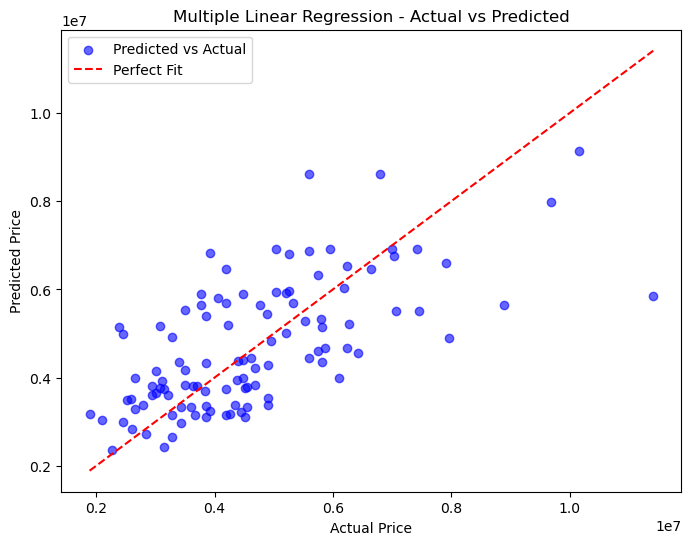

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Fit")  # reference line

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression - Actual vs Predicted")
plt.legend()
plt.show()


In [18]:
# input values
x_new = np.array([[7000, 3, 2]])

predicted_price = model.predict(x_new)
print("Predicted Price:", predicted_price[0])


Predicted Price: 6716190.432428488
